### Q. 1. List of sku_descriptions that comprises at least 80% of the total revenue
### made in the dataset time period

In [ ]:
#Importing the pandas and openpyxl library 

import pandas as pd
import openpyxl
print(1+1)

2


In [2]:
# loading  the dataset into data dataframe 
data = pd.read_csv("12Months_Data.csv")

In [ ]:
# To see first 5 rows of dataframe . It helps to give overview of dataset
data.head()

,date,top_slug,mid_slug,leaf_slug,sku_description,average_sp,average_mrp,sales,total_qty,count_of_bills,member_count,avg_bill_value,platform_member_count,platform_orders,platform_sales
0,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho soursop 1 pc 400 - 800g,92.3063,121.4563,2030.7400,22.00,16,15,810.4904,22153,24816,3.627586e+07
1,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho custard-apple 1 kg,108.2621,142.4463,9823.7048,90.74,83,83,1653.5115,22153,24816,3.627586e+07
2,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho blueberry 125 g,191.9226,253.7656,57960.6400,302.00,222,219,1707.8647,22153,24816,3.627586e+07
3,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho avocado-imported-medium 1 pc,98.2729,129.6135,8254.9300,84.00,53,53,1753.6248,22153,24816,3.627586e+07
4,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho passion-fruit 250 g,79.0833,104.0530,1276.4050,16.14,7,7,672.6753,22153,24816,3.627586e+07


In [4]:
# To check wheather sales and sku_description columns exist in dataframe

if 'sales' not in data.columns or 'sku_description' not in data.columns:
    raise ValueError("Dataset must contain 'sales' and 'sku_description' columns.")


In [7]:
# First we Group data by SKU description and sum the sales for each SKU.   
# for each group the sales column is summed up using sum function  
# This gives total sales for each SKU description.
# reset_index() makes sure the result is in a clean DataFrame

sku_revenue = data.groupby('sku_description')['sales'].sum().reset_index()

In [9]:
# Now we Sort the data by total sales in descending order.
# This will show the highest-selling SKUs at the top.

sku_revenue = sku_revenue.sort_values(by='sales', ascending=False)

In [10]:
# This will show the 5 rows of dataframe

sku_revenue.head()

,sku_description,sales
69989,Thums Up soft-drink 750 ml Bottle Pack of 24,3.283244e+08
69982,Thums Up soft-drink 2.25 L Bottle Pack of 9,1.708238e+08
42165,Maaza mango-drink-original-flavour-refreshing ...,1.498111e+08
64930,Sprite soft-drink 750 ml Bottle Pack of 24,1.464930e+08
1098,Aashirvaad superior-mp-atta 10 kg,9.149876e+07


In [11]:
# Calculate the total revenue by summing up all sales.
total_revenue = sku_revenue['sales'].sum()

In [12]:
total_revenue

np.float64(12843908099.8093)

In [13]:
# Now we will Calculate the cumulative revenue by adding up sales progressively for each SKU.

sku_revenue['cumulative_revenue'] = sku_revenue['sales'].cumsum()

# Then we will Calculate the cumulative percentage of total revenue for each SKU.
# This shows how much each SKU contributes to the overall revenue.

sku_revenue['cumulative_percentage'] = (sku_revenue['cumulative_revenue'] / total_revenue) * 100

In [14]:
# Now In final stage we will Select SKUs that contribute to the top 80% of the total revenue.
# This filters the SKUs where cumulative percentage is less than or equal to 80.
top_skus = sku_revenue[sku_revenue['cumulative_percentage'] <= 80]

In [15]:
# Convert the 'sku_description' column of top SKUs into a list. 
# Converting into a list makes it easier to work
top_sku_descriptions = top_skus['sku_description'].tolist()

In [16]:
# to view final dataframe
top_skus

,sku_description,sales,cumulative_revenue,cumulative_percentage
69989,Thums Up soft-drink 750 ml Bottle Pack of 24,3.283244e+08,3.283244e+08,2.556266
69982,Thums Up soft-drink 2.25 L Bottle Pack of 9,1.708238e+08,4.991483e+08,3.886265
42165,Maaza mango-drink-original-flavour-refreshing ...,1.498111e+08,6.489594e+08,5.052663
64930,Sprite soft-drink 750 ml Bottle Pack of 24,1.464930e+08,7.954524e+08,6.193227
1098,Aashirvaad superior-mp-atta 10 kg,9.149876e+07,8.869511e+08,6.905617
...,...,...,...,...
49260,Nimyle floor-cleaner-lemongrass-with-power-of-...,5.720136e+05,1.027281e+10,79.981937
8801,Britannia gobbles-bar-cake-fruity-fun-soft-flu...,5.718980e+05,1.027338e+10,79.986389
42713,Mamaearth ubtan-face-wash 100 ml,5.718216e+05,1.027395e+10,79.990841
24373,Fresho whole-wheat-pizza-base-preservative-fre...,5.717198e+05,1.027452e+10,79.995293


In [ ]:
# hence we print the top top_sku_descriptions
print("SKU Descriptions contributing at least 80% of total revenue:")
print(top_sku_descriptions)

SKU Descriptions contributing at least 80% of total revenue:
['Thums Up soft-drink 750 ml Bottle Pack of 24', 'Thums Up soft-drink 2.25 L Bottle Pack of 9', 'Maaza mango-drink-original-flavour-refreshing 1.5 l Pet Bottle ', 'Sprite soft-drink 750 ml Bottle Pack of 24', 'Aashirvaad superior-mp-atta 10 kg  ', 'Nandini pure-ghee 1 L Pouch ', 'Sprite soft-drink 2.25 L Bottle Pack of 9', 'Maaza juice-mango 600 ml Bottle Pack of 24', 'Maaza juice-mango 1.5 L  (Pack of 12)', 'Glow & Lovely advanced-multivitamin-face-cream 15 g  ', 'Fortune sun-lite-sunflower-refined-oil 1 L Pouch ', '3 Roses dust-tea 8 g  ', 'Tata Sampann unpolished-toor-dalarhar-dal 1 kg Pouch ', 'Aashirvaad superior-mp-atta 5 kg  ', 'Nandini goodlife-uht-treated-toned-milk 500 ml Pouch ', 'Parle hide-seek-chocolate 100 g Pouch ', 'Fresho horeca-chicken-curry-cut-skinless-30-gm 2 kg  ', 'Fresho fresho-pomegranate-regular 1 kg  (5-6 pcs per kg)', 'Fresho potato 1 kg  ', 'Milky Mist paneer-rich-in-protein-calcium-excellent-tas

In [ ]:
# creating an excel sheet for this 

top_skus.to_excel('top_80_percent_skus.xlsx', index=False)
print("The results have been saved to 'top_80_percent_skus.xlsx'.")

The results have been saved to 'top_80_percent_skus.xlsx'.


### Q.2 The highest selling sku (by quantity) for every leaf_slug

In [19]:
# Checking wheather given columns are in dataframe or not 

if 'leaf_slug' not in data.columns or 'sku_description' not in data.columns or 'total_qty' not in data.columns:
    raise ValueError("Dataset must contain 'leaf_slug', 'sku_description', and 'total_qty' columns.")

In [20]:
# First of all we will group the data by leaf_slug and sku_description and sum the total_qty for each combination.
# This helps us get the total quantity sold for each SKU under each leaf category.

sales_by_sku = data.groupby(['leaf_slug', 'sku_description'])['total_qty'].sum().reset_index()

In [21]:
# Now we will find  the SKU with the highest total quantity for each 'leaf_slug' category.
# This picks the top-selling SKU in each category.

top_sellers = sales_by_sku.loc[sales_by_sku.groupby('leaf_slug')['total_qty'].idxmax()]

In [22]:
# Sorting  the top sellers by 'total_qty' in descending order.
# This will show the highest-selling SKUs at the top.

top_sellers_sorted = top_sellers.sort_values('total_qty', ascending=False)

In [23]:
# Adding  a rank column to the sorted top sellers, starting from 1.
# This assigns a rank to each SKU based on its total quantity, with the highest seller ranked first.

top_sellers_sorted['rank'] = range(1, len(top_sellers_sorted) + 1)

In [24]:
# Calculating highest quantity , highest_quantity , avg_quantity_per_category, total_quantity_sold, total_leaf_categories using different functions 

summary_stats = {
    'total_leaf_categories': len(top_sellers_sorted),
    'total_quantity_sold': top_sellers_sorted['total_qty'].sum(),
    'avg_quantity_per_category': top_sellers_sorted['total_qty'].mean(),
    'highest_quantity': top_sellers_sorted['total_qty'].max(),
    'lowest_quantity': top_sellers_sorted['total_qty'].min()
}

In [25]:
# Printing the stats we calculated above using a for loop 

print("\nSummary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value:,.2f}")


Summary Statistics:
total_leaf_categories: 447.00
total_quantity_sold: 61,855,546.14
avg_quantity_per_category: 138,379.30
highest_quantity: 11,961,344.00
lowest_quantity: 3.00


In [26]:
# Creating an Excel sheet of this task 
output_file = "top_sellers_by_leaf.xlsx"
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    top_sellers_sorted.to_excel(writer, sheet_name='Top Sellers', index=False)

### Q.3 The average % contribution of average_sp of each sku to the avg_bill_value
### and arrange them in descending order of % contribution. Provide the list of top 10
### skus along with their % contribution

In [27]:
# Again checking wheather the required colimns are in dataframe or not 
if 'sku_description' not in data.columns or 'average_sp' not in data.columns or 'avg_bill_value' not in data.columns:
    raise ValueError("Dataset must contain 'sku_description', 'average_sp', and 'avg_bill_value' columns.")

In [28]:
# Calculating  the percentage contribution of 'average_sp' to 'avg_bill_value'.
# This gives the ratio of average selling price to the average bill value for each record
data['percent_contribution'] = (data['average_sp'] / data['avg_bill_value']) 

# At this point, I solved the given problem using the provided dataset. However, the output was incorrect 
# because the 'percent_contribution' exceeded 100%. This happened because, in some cases, 'average_sp' 
# was greater than 'avg_bill_value', which is technically not possible.
# Now then with the help of below data exploration i figured out this issue 

In [ ]:
# Calculating man an min of both columns 
print("Data Overview:")
print("Min average_sp:", data['average_sp'].min())
print("Max average_sp:", data['average_sp'].max())
print("Min avg_bill_value:", data['avg_bill_value'].min())
print("Max avg_bill_value:", data['avg_bill_value'].max())

Data Overview:
Min average_sp: 0.7142
Max average_sp: 22066.0
Min avg_bill_value: 0.7425
Max avg_bill_value: 2755063.0


In [ ]:
# Filter rows where 'average_sp' (average selling price) is greater than 'avg_bill_value' (average bill value),
# as this is not a valid condition.
problematic_rows = data[data['average_sp'] > data['avg_bill_value']]
if len(problematic_rows) > 0:
    print("\nWarning: Found rows where item price exceeds bill value:")
    print(f"Number of problematic rows: {len(problematic_rows)}")
    print("\nSample of problematic rows:")
    print(problematic_rows[['sku_description', 'average_sp', 'avg_bill_value']].head())


Number of problematic rows: 67

Sample of problematic rows:
                                          sku_description  average_sp  \
46914   The Face Shop rice-ceramide-moisturizing-skinc...       595.0   
72749   Klassic flower-pot-with-chain-apple-green-19-c...       379.0   
175920    Fresho grapes-green-sonaka Approx 500 g 1 Pack         90.0   
195403  O2PRO surgical-face-mask-blue-3-ply-spun-bound...        50.0   
209076  Steelo pet-selo-container-set-silver 500 ml  P...       169.0   

        avg_bill_value  
46914             5.95  
72749           113.70  
175920           55.29  
195403            5.00  
209076          152.10  


In [31]:
# Filter out rows where 'average_sp' (average selling price) is greater than 'avg_bill_value' (average bill value).
# This creates a new dataset with only valid rows where item price is not exceeding the bill value.

clean_data = data[data['average_sp'] <= data['avg_bill_value']]

In [32]:
clean_data

,date,top_slug,mid_slug,leaf_slug,sku_description,average_sp,average_mrp,sales,total_qty,count_of_bills,member_count,avg_bill_value,platform_member_count,platform_orders,platform_sales,percent_contribution
0,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho soursop 1 pc 400 - 800g,92.3063,121.4563,2030.7400,22.00,16,15,810.4904,22153,24816,3.627586e+07,0.113889
1,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho custard-apple 1 kg,108.2621,142.4463,9823.7048,90.74,83,83,1653.5115,22153,24816,3.627586e+07,0.065474
2,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho blueberry 125 g,191.9226,253.7656,57960.6400,302.00,222,219,1707.8647,22153,24816,3.627586e+07,0.112376
3,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho avocado-imported-medium 1 pc,98.2729,129.6135,8254.9300,84.00,53,53,1753.6248,22153,24816,3.627586e+07,0.056040
4,2022-10-22,fruits-vegetables,exotic-fruits-veggies,exotic-fruits,Fresho passion-fruit 250 g,79.0833,104.0530,1276.4050,16.14,7,7,672.6753,22153,24816,3.627586e+07,0.117565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136227,2023-09-30,beauty-hygiene,bath-hand-wash,shower-gel-body-wash,Fiama happy-naturals-shower-gel-plum-blossom-y...,249.5000,499.0000,249.5000,1.00,1,1,3511.7200,20194,22115,4.639351e+07,0.071048
6136228,2023-09-30,cleaning-household,pooja-needs,agarbatti-incense-sticks,Universal Deep royal-dhoop-sticks-lily-fragran...,30.0000,30.0000,30.0000,1.00,1,1,3582.0000,20194,22115,4.639351e+07,0.008375
6136229,2023-09-30,beauty-hygiene,bath-hand-wash,bathing-bars-soaps,Patanjali panchgavya-kanti-body-cleanser 75 g ...,32.0000,32.0000,64.0000,2.00,1,1,7049.3300,20194,22115,4.639351e+07,0.004539
6136230,2023-09-30,foodgrains-oil-masala,dry-fruits,mukhwas,Tummy Pops saunf 211 g,249.0000,249.0000,498.0000,2.00,1,1,3619.7536,20194,22115,4.639351e+07,0.068789


In [ ]:
# Calculate the percentage contribution of 'average_sp' to 'avg_bill_value' for the cleaned data.
# This gives the correct percentage where the item price is not exceeding the bill value.

clean_data['percent_contribution'] = (clean_data['average_sp'] / clean_data['avg_bill_value']) * 100


C:\Users\Malayaj\AppData\Local\Temp\ipykernel_9884\3542799513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['percent_contribution'] = (clean_data['average_sp'] / clean_data['avg_bill_value']) * 100


In [ ]:
# Printing the percent_contribution 
clean_data.percent_contribution

0          11.388944
1           6.547405
2          11.237576
3           5.603987
4          11.756534
             ...    
6136227     7.104781
6136228     0.837521
6136229     0.453944
6136230     6.878921
6136231     3.102725
Name: percent_contribution, Length: 6136165, dtype: float64

In [ ]:
# Sort the 'percent_contribution' column in ascending order.
# This allows you to see the values from lowest to highest percentage contribution.

clean_data.percent_contribution.sort_values()

4303561      0.000225
5287468      0.000423
1631785      0.000455
5311670      0.000543
3587747      0.000564
              ...    
5340999    100.000000
286571     100.000000
6136178    100.000000
836830     100.000000
6136216    100.000000
Name: percent_contribution, Length: 6136165, dtype: float64

In [36]:
# Count the number of missing (NaN) values in the 'percent_contribution' column.
nan_count = clean_data['percent_contribution'].isnull().sum()

In [37]:
nan_count

np.int64(0)

In [38]:
# As there is no rows having Nan values Still if there were Nan values we can use this  
clean_data['percent_contribution'] = clean_data['percent_contribution'].fillna(0)

C:\Users\Malayaj\AppData\Local\Temp\ipykernel_9884\3231771180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['percent_contribution'] = clean_data['percent_contribution'].fillna(0)


In [39]:
# Group the cleaned data by 'sku_description' and calculate the average 'percent_contribution' for each SKU.
# This gives the average contribution percentage for each SKU in the dataset.

sku_contribution = clean_data.groupby('sku_description')['percent_contribution'].mean().reset_index()

In [40]:
sku_contribution

,sku_description,percent_contribution
0,food-package-medium 450 ml pack of 10,4.677589
1,&Stirred bloody-mary-tomato-pepper 125 ml,7.278024
2,&Stirred classic-colada-mocktails-authentic-ri...,5.645782
3,&Stirred cocktail-mix-whisky-sour 100 ml Mono ...,15.491633
4,&Stirred cosmopolitan-cocktail-mix-refreshing-...,7.764983
...,...,...
78114,ÃUI red-velvet-eggless-cake-mix-luxe-edition-...,40.234928
78115,ÃUI rich-plum-cake-egg-based-holiday-edition-...,17.908659
78116,ÃUI rich-plum-cake-eggless-holiday-limited-ed...,32.760023
78117,ÃUI strawberry-chiffon-eggless-cake-mix-luxe-...,16.339158


In [41]:
# Sort the 'sku_contribution' data by 'percent_contribution' in descending order.
# This places the SKUs with the highest contribution percentage at the top.

sku_contribution = sku_contribution.sort_values(by='percent_contribution', ascending=False) 

In [49]:
top_10_skus = sku_contribution.head(10)

In [50]:
# Printing top 10 skus 
top_10_skus

,sku_description,percent_contribution
3693,Azafran organics-aqua-halo-scalp-rejuvenating-...,100.0
57690,Pure Nutrition co-enzyme-q10-125-mg-for-cellul...,100.0
72852,Vauva silicone-feeding-nippleteat-wide-neck-ni...,100.0
8062,Body Cupid shea-with-argan-oil-body-butter 200...,100.0
8061,Body Cupid secret-love-eau-de-parfum-for-women...,100.0
20388,FLiCKA cover-story-liquid-concealer-medium-to-...,100.0
57730,Pure Nutrition vitamin-d3-tablets-support-bone...,100.0
48809,Nestle candy-gobstopper 50.1 g,100.0
54397,Petals pre-seasoned-cast-iron-tawa-28-cm-induc...,100.0
26294,Godrej Jersey buffalo-ghee 1 L Jar,100.0


In [43]:
# Again  Creating Excel sheet for this 
top_10_skus.to_excel('top_10_skus_by_contribution.xlsx', index=False)

###  Ques.4 Trend of weekly revenue generated by the company.

In [30]:
# Importing  the 'matplotlib.pyplot' module, which is used for creating visualizations
import matplotlib.pyplot as plt 

In [31]:
# Converting  the 'date' column to a datetime format for easier manipulation and analysis.
# This ensures the 'date' values are in a consistent date format.
data['date'] = pd.to_datetime(data['date'])

In [32]:
data.date

0         2022-10-22
1         2022-10-22
2         2022-10-22
3         2022-10-22
4         2022-10-22
             ...    
6136227   2023-09-30
6136228   2023-09-30
6136229   2023-09-30
6136230   2023-09-30
6136231   2023-09-30
Name: date, Length: 6136232, dtype: datetime64[ns]

In [33]:
# Set the 'date' column as the index of the dataset.
# This allows for easier time-based operations 
data.set_index('date', inplace=True)

In [34]:
# Now we resample the platform_sales column by week ('W') and calculate the weekly sum.
# This aggregates the sales data into weekly totals for analysis.
weekly_revenue = data['platform_sales'].resample('W').sum()

In [35]:
weekly_revenue

date
2022-10-02    1.383482e+12
2022-10-09    4.100244e+12
2022-10-16    4.478413e+12
2022-10-23    4.091610e+12
2022-10-30    3.247535e+12
2022-11-06    5.348918e+12
2022-11-13    4.205974e+12
2022-11-20    3.764044e+12
2022-11-27    3.741619e+12
2022-12-04    5.033772e+12
2022-12-11    4.470788e+12
2022-12-18    3.892144e+12
2022-12-25    3.451158e+12
2023-01-01    3.793629e+12
2023-01-08    5.658079e+12
2023-01-15    4.046659e+12
2023-01-22    3.748668e+12
2023-01-29    3.268527e+12
2023-02-05    4.479254e+12
2023-02-12    4.331692e+12
2023-02-19    4.071759e+12
2023-02-26    3.874472e+12
2023-03-05    5.494385e+12
2023-03-12    4.180978e+12
2023-03-19    3.861002e+12
2023-03-26    3.626959e+12
2023-04-02    4.366243e+12
2023-04-09    4.520009e+12
2023-04-16    3.778713e+12
2023-04-23    3.756790e+12
2023-04-30    3.862607e+12
2023-05-07    4.731222e+12
2023-05-14    4.030802e+12
2023-05-21    3.925414e+12
2023-05-28    4.089948e+12
2023-06-04    5.387264e+12
2023-06-11    4.848820e

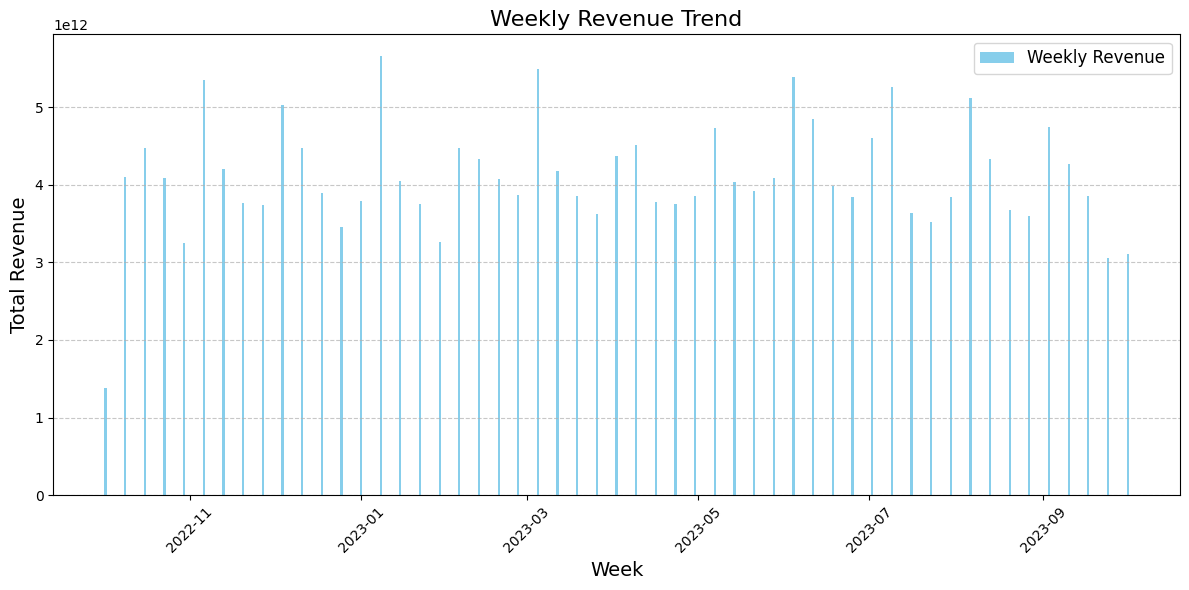

In [37]:
# Way to visualize with the help of  Bar Chart for Weekly Revenue

plt.figure(figsize=(12, 6))

# Create a bar chart to show weekly revenue
plt.bar(weekly_revenue.index, weekly_revenue.values, color='skyblue', label='Weekly Revenue')

# Adding a title to the chart
plt.title('Weekly Revenue Trend', fontsize=16)

# Giving X label and Y label to the chart 
plt.xlabel('Week', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

# Adding a grid to the y-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(fontsize=12)

# Rotate the x-axis labels (weeks) by 45 degrees for better readability.
plt.xticks(rotation=45)
plt.tight_layout()

# Finally plotting 
plt.show()


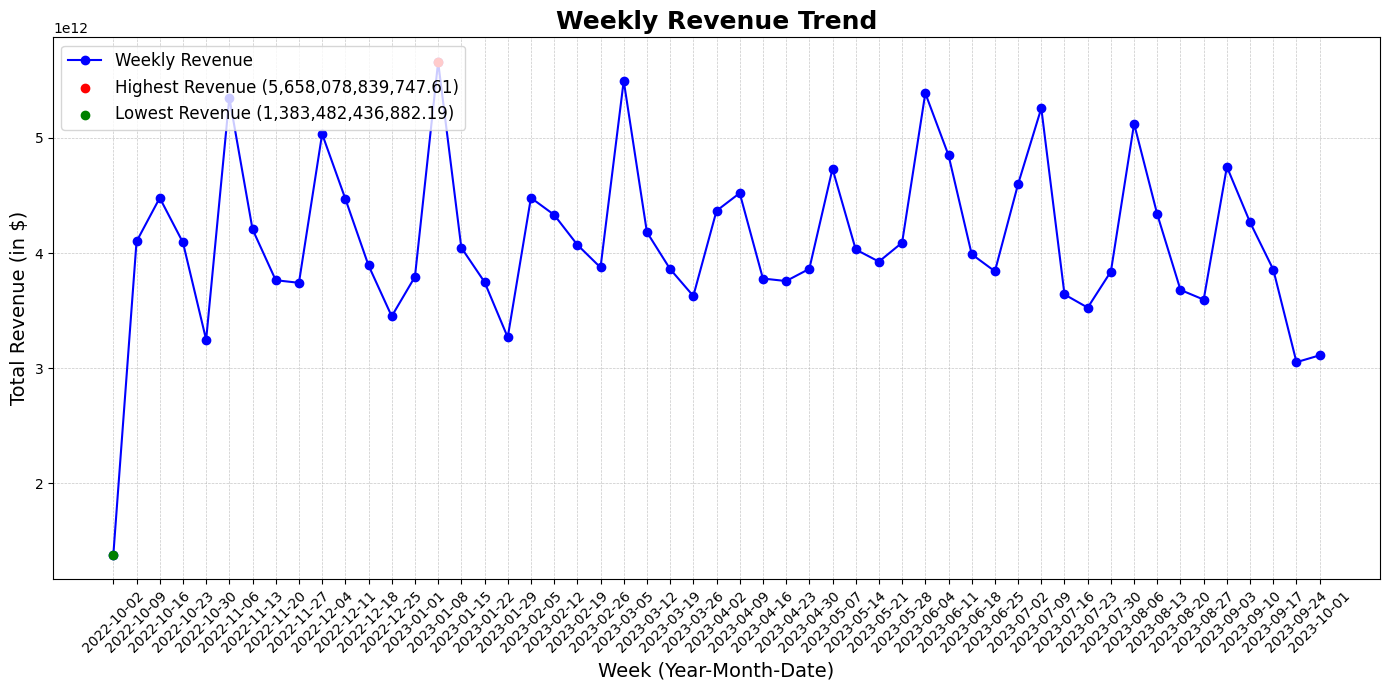

In [43]:
# Line chart with more detailed visualization
plt.figure(figsize=(14, 7))

# Plotting the weekly revenue
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o', linestyle='-', color='blue', label='Weekly Revenue')

# Highlight the maximum and minimum points
max_week = weekly_revenue.idxmax()
min_week = weekly_revenue.idxmin()
plt.scatter(max_week, weekly_revenue.max(), color='red', label=f'Highest Revenue ({weekly_revenue.max():,.2f})', zorder=5)
plt.scatter(min_week, weekly_revenue.min(), color='green', label=f'Lowest Revenue ({weekly_revenue.min():,.2f})', zorder=5)

# Adding labels and title
plt.title('Weekly Revenue Trend', fontsize=18, fontweight='bold')
plt.xlabel('Week (Year-Month-Date)', fontsize=14)
plt.ylabel('Total Revenue (in $)', fontsize=14)

# Adding grid and axis labels
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(weekly_revenue.index, labels=weekly_revenue.index.strftime('%Y-%m-%d'), rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding a legend
plt.legend(fontsize=12, loc='upper left')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


### Creating a final excel workbook with final sheets 

In [45]:
# defining df1 df2 and df3

df1 = pd.read_excel('top_80_percent_skus.xlsx')
df2 = pd.read_excel('top_sellers_by_leaf.xlsx')
df3 = pd.read_excel('top_10_skus_by_contribution.xlsx')

In [46]:
# merging all excel sheets into a single excel workbook As asked by YOU
merged_workbook = 'final_skus_analysis.xlsx'

with pd.ExcelWriter(merged_workbook, engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='top_80_percent_skus', index=False)
    df2.to_excel(writer, sheet_name='Highest Selling SKUs', index=False)
    df3.to_excel(writer, sheet_name='Top 10 SKUs', index=False)

print(f"Final Excel workbook '{merged_workbook}' has been created with 3 sheets.")

Final Excel workbook 'final_skus_analysis.xlsx' has been created with 3 sheets.


##### Thank You 

##### Assignment is done from my side 

##### Hoping positive response from your side 